# 🔁 트랜스포머(Transformer) vs 🖼️ 비전 트랜스포머(ViT)

## 📌 기본 개념 비교

| 항목 | 트랜스포머 (Transformer) | 비전 트랜스포머 (Vision Transformer, ViT) |
|------|---------------------------|--------------------------------------------|
| **원래 목적** | 자연어 처리 (NLP) | 이미지 처리 (CV) |
| **입력 데이터** | 단어 시퀀스 (토큰) | 이미지 패치 (조각) |
| **입력 표현 방식** | 단어 임베딩 + 위치 인코딩 | 패치 임베딩 + 위치 인코딩 |
| **출력** | 문장, 분류 결과 등 | 이미지 분류, 탐지 등 |

---

## 🧠 트랜스포머 구조 요약

- **입력**: 문장을 단어 토큰으로 쪼갠 뒤 임베딩 처리
- **핵심 구조**:
  - `Self-Attention`: 각 단어가 다른 단어와 얼마나 연관 있는지 계산
  - `Feed Forward Layer`: 비선형 연산
  - `Position Encoding`: 단어 순서 정보 보정
- **응용 예시**: GPT, BERT, T5 등

---

## 🎨 비전 트랜스포머 구조 요약

- **입력**: 이미지를 `N`개의 작은 패치 (예: 16x16)로 나눔
- **처리**:
  - 각 패치를 벡터로 변환 (패치 임베딩)
  - 패치들의 순서를 고려해 Position Encoding 추가
  - 트랜스포머에 입력
- **결과**: 주로 `CLS 토큰`을 통해 전체 이미지 분류

---

## ⚖️ 핵심 차이점 정리

| 항목 | Transformer | Vision Transformer |
|------|-------------|--------------------|
| **입력 단위** | 단어 (Word Token) | 이미지 패치 (Image Patch) |
| **위치 인코딩** | 단어의 순서 | 패치의 위치 |
| **사전 구조** | 없음 | CNN 없이 처리 |
| **관점** | 문맥 중심 (단어 간 관계) | 전체 이미지 구조 중심 (패치 간 관계) |
| **성능 조건** | 비교적 적은 데이터로 학습 가능 | 대규모 데이터에서 우수한 성능 |

---

## 📚 참고 자료

- 📄 [An Image is Worth 16x16 Words (ViT 논문)](https://arxiv.org/abs/2010.11929) - Dosovitskiy et al., 2020  
- 📄 [Attention is All You Need (Transformer 논문)](https://arxiv.org/abs/1706.03762) - Vaswani et al., 2017  

# 🔍 트랜스포머(Transformer) vs 비전 트랜스포머(ViT)  
## ✅ 공통점

| 항목 | 설명 |
|------|------|
| **기본 구조** | 둘 다 트랜스포머 아키텍처를 기반으로 함 (Multi-Head Attention, Feedforward Network 등 동일) |
| **Self-Attention 사용** | 입력 간의 관계(단어 간 or 이미지 패치 간)를 파악하기 위해 Self-Attention 사용 |
| **Position Encoding 사용** | 순서 정보를 명시적으로 주기 위해 위치 인코딩(Position Encoding) 사용 |
| **입력 시퀀스화** | 입력 데이터를 시퀀스로 변환하여 트랜스포머에 적용 |
| **사전학습 + 파인튜닝** | 대규모 사전학습(pretraining) 후, 다운스트림 태스크에 파인튜닝 가능 |
| **병렬 처리** | CNN이나 RNN보다 병렬처리에 유리한 구조 (특히 GPU에서) |

---

## 🚫 차이점

| 항목 | 트랜스포머 (Transformer) | 비전 트랜스포머 (ViT) |
|------|---------------------------|------------------------|
| **입력 데이터** | 단어 토큰 시퀀스 | 이미지 패치 시퀀스 |
| **도메인** | 자연어 처리 (NLP) | 컴퓨터 비전 (CV) |
| **전처리 방식** | 문장을 토큰화 → 임베딩 | 이미지를 패치로 나눔 → 임베딩 |
| **출력 방식** | 문장 생성, 분류 등 다양 | 보통 분류(classification) |
| **위치 인코딩 의미** | 단어의 순서 보정 | 이미지 패치의 공간 위치 보정 |
| **성능 특성** | 적은 데이터에서도 잘 작동 | 많은 데이터가 있어야 성능 극대화됨 |
| **초기 아키텍처** | 텍스트 전용 설계 | CNN 없이 순수 트랜스포머로 이미지 처리 |

---

## 📘 요약

- 트랜스포머와 ViT는 **구조는 같지만, 사용하는 데이터 도메인**이 다르다.
- ViT는 **이미지를 토큰처럼 다루는 아이디어**로, 트랜스포머를 이미지 분야에 확장한 것.
- 둘 다 **Self-Attention으로 전체 문맥 또는 전체 이미지를 한 번에 파악**할 수 있는 것이 강점이다.



In [1]:
# 1 번 블록 : 패키지 수입
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from torch.nn import CrossEntropyLoss
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor
from time import time

In [6]:
# 2번 블록 : 하이퍼 파라미터 지정
MY_SHAPE = (1, 28, 28)
# 입력이미지형태(MNIST: 흑백28x28)
MY_EPOCH = 5
MY_BATCH = 128
MY_LEARNING = 0.005
MY_PATCH = 7
# 학습반복횟수(성능향상위해5 이상권장)
# 배치크기(GPU 메모리에따라조절가능)
# 학습률(기본Adam 기준, 너무크면발산위험)
# 한변을나누는패치수(7x7 → 총49개패치)
MY_ENCODER = 2  # 인코더블록수(Transformer encoder layer 수)
MY_HIDDEN = 8  # 패치임베딩차원수(작으면연산량작아져표현력제한됨)
MY_HEAD = 2  # 멀티헤드어텐션에서의헤드수(각head당8/2=4차원)
MY_MLP = 3
# MLP 확장비율(hidden → hidden×3 → hidden)
MY_CLASS = 10
# 클래스수(MNIST: 숫자0~9)
# GPU 사용가능하면GPU로설정
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("사용 장치:", DEVICE)

사용 장치: cuda


In [10]:
# 3번 블록: 이미지를 패치로 나누고 16차원 벡터로 변형
def patchify(images, n_patches):  # batch=128
    n, c, h, w = images.shape  # 예: [128, 1, 28, 28] → n=128, c=1, h=28, w=28
    patch_size = h // n_patches  # 28 // 7 = 4

    # 각 패치는 4x4 = 16 픽셀 → flatten 후 16차원 벡터
    # 총 패치 수: 7x7 = 49 → 출력 shape: [128, 49, 16]
    patches = torch.zeros(
        n, n_patches**2, h * w * c // (n_patches**2), device=images.device
    )

    for idx, image in enumerate(images):
        for i in range(n_patches):  # 세로 방향 7개
            for j in range(n_patches):  # 가로 방향 7개
                patch = image[
                    :,
                    i * patch_size : (i + 1) * patch_size,
                    j * patch_size : (j + 1) * patch_size,
                ]  # patch shape: [1, 4, 4]

                patches[idx, i * n_patches + j] = (
                    patch.flatten()
                )  # 16차원 벡터로 변형, [16]

    return patches

In [11]:
# 4번 블럭
# multi-head attention 클래스 정의
# n_hidden : 임베딩 차원 수 , 8
# n_heads: 머리 수, 2

import torch
import torch.nn as nn


class MyMSA(nn.Module):
    def __init__(self, n_hidden, n_heads):
        super(MyMSA, self).__init__()
        self.n_hidden = n_hidden
        self.n_heads = n_heads

        # 각 head가 처리할 차원 수, 예: 8 / 2 = 4
        d_head = int(n_hidden / n_heads)
        self.d_head = d_head

        # Q, K, V 행렬 생성 (head 수만큼 각각 별도로)
        self.q_mappings = nn.ModuleList(
            [nn.Linear(d_head, d_head) for _ in range(n_heads)]
        )
        self.k_mappings = nn.ModuleList(
            [nn.Linear(d_head, d_head) for _ in range(n_heads)]
        )
        self.v_mappings = nn.ModuleList(
            [nn.Linear(d_head, d_head) for _ in range(n_heads)]
        )

        self.softmax = nn.Softmax(dim=-1)

    def forward(self, images):
        # 입력 shape: [128, 50, 8]
        # 출력 shape: [128, 50, 8]
        result = []

        for sequence in images:  # sequence shape: [50, 8]
            seq_result = []

            for head in range(self.n_heads):
                q_mapping = self.q_mappings[head]
                k_mapping = self.k_mappings[head]
                v_mapping = self.v_mappings[head]

                # head별 입력 분리: [50, 4]
                seq = sequence[:, head * self.d_head : (head + 1) * self.d_head]

                # Q, K, V 계산
                q = q_mapping(seq)
                k = k_mapping(seq)
                v = v_mapping(seq)

                # attention score 계산
                attention = self.softmax(q @ k.T / (self.d_head**0.5))
                attention = attention @ v

                seq_result.append(attention)

            # 두 head의 결과 [50, 4] + [50, 4] → [50, 8]
            merge = torch.hstack(seq_result)
            result.append(merge)

        print("최종 배치 처리 결과:", len(result))

        # 결과를 텐서로 변환: [128, 50, 8]
        final = [torch.unsqueeze(r, dim=0) for r in result]
        final = torch.cat(final)

        print("attention 결과 데이터 모양:", final.shape)
        return final


data = torch.randn(MY_BATCH, 1, 28, 28)
y = patchify(data, MY_PATCH)  # patchify 함수는 앞에서 정의되어 있어야 함
temp = MyMSA(MY_HIDDEN, MY_HEAD)
temp(y)

최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 49, 8])


tensor([[[ 0.3323,  0.2680,  0.3176,  ...,  0.4573,  0.1746, -0.4214],
         [ 0.1875,  0.3558,  0.3152,  ...,  0.4749,  0.2597, -0.4495],
         [ 0.2035,  0.2705,  0.3602,  ...,  0.4549,  0.1932, -0.4309],
         ...,
         [ 0.4051,  0.3408,  0.2294,  ...,  0.4392,  0.1997, -0.4457],
         [ 0.0664,  0.2887,  0.4150,  ...,  0.4130,  0.1693, -0.4634],
         [ 0.0863,  0.2648,  0.4153,  ...,  0.4262,  0.1655, -0.4412]],

        [[ 0.0076,  0.2734,  0.4053,  ...,  0.5008,  0.1922, -0.4356],
         [-0.0285,  0.2789,  0.4248,  ...,  0.4387,  0.0501, -0.4056],
         [ 0.0680,  0.3655,  0.2937,  ...,  0.5073,  0.1630, -0.3957],
         ...,
         [ 0.0622,  0.2144,  0.4001,  ...,  0.4517,  0.0602, -0.3950],
         [ 0.1074,  0.2307,  0.3580,  ...,  0.4667,  0.0799, -0.3883],
         [-0.0721,  0.2898,  0.4569,  ...,  0.5676,  0.2376, -0.3856]],

        [[ 0.2791,  0.2531,  0.3092,  ...,  0.3776,  0.0466, -0.4486],
         [ 0.2235,  0.2587,  0.3371,  ...,  0

In [12]:
# 5번 블록
# ViT 인코더 구현
# n_hidden: 임베딩 차원 수, 예: 8
# n_heads : 머리 수, 예: 2

import torch.nn as nn


class MyEncoder(nn.Module):
    def __init__(self, n_hidden, n_heads):
        super(MyEncoder, self).__init__()

        # 패치 임베딩 차원
        self.n_hidden = n_hidden

        # 멀티 헤드 어텐션 수
        self.n_heads = n_heads

        # 첫 번째 layer normalization 층
        self.norm1 = nn.LayerNorm(n_hidden)

        # multi-head attention layer
        self.msa = MyMSA(n_hidden, n_heads)

        # 두 번째 layer normalization 층
        self.norm2 = nn.LayerNorm(n_hidden)

        # 최종 multi-layer perceptron layer
        self.mlp = nn.Sequential(
            nn.Linear(n_hidden, MY_MLP * n_hidden),
            nn.GELU(),  # Gauss 기반 함수가 음수 영역에 적용된 형태의 ReLU 변형
            nn.Linear(MY_MLP * n_hidden, n_hidden),
        )

    # forward 메서드
    def forward(self, x):
        out = x + self.msa(self.norm1(x))  # Residual + Attention
        out = self.norm2(out)  # LayerNorm 후
        out = out + self.mlp(out)  # Residual + MLP
        return out

In [13]:
# 6번 블록
# Vision Transformer (ViT) 전체 구조

import torch
import torch.nn as nn


class MyViT(nn.Module):
    def __init__(
        self, n_patches, n_encoder, n_hidden, n_heads, n_class, image_shape=(1, 28, 28)
    ):
        super(MyViT, self).__init__()

        self.n_patches = n_patches  # 예: 7
        self.n_encoder = n_encoder  # 예: 2
        self.n_heads = n_heads  # 예: 2
        self.n_hidden = n_hidden  # 예: 8

        # 한 패치의 픽셀 수 (패치 한 변의 길이)^2
        self.input_d = (image_shape[1] // n_patches) ** 2
        print("패치 차원 수 :", self.input_d)

        # 입력 벡터 (input_d) → 임베딩 차원 (n_hidden)으로 변환
        self.linear_mapper = nn.Linear(self.input_d, n_hidden)

        # 학습 가능한 CLS 토큰 추가: [1, 1, n_hidden]
        self.cls_token = nn.Parameter(torch.rand(1, 1, n_hidden))
        print("CLS 토큰 모양 :", self.cls_token.shape)

        # 포지셔널 인코딩: [1, 패치수+1, n_hidden]
        self.pos_embedding = nn.Parameter(torch.rand(1, n_patches**2 + 1, n_hidden))

        # 인코더 블록 여러 개 쌓기
        self.encoder = nn.Sequential(
            *[MyEncoder(n_hidden, n_heads) for _ in range(n_encoder)]
        )

        # 최종 분류기
        self.mlp_head = nn.Linear(n_hidden, n_class)

    def forward(self, images):
        B = images.shape[0]  # 배치 크기

        # 이미지를 패치 시퀀스로 변환
        x = patchify(images, self.n_patches)  # [B, num_patches, patch_dim]
        x = self.linear_mapper(x)  # [B, num_patches, n_hidden]

        # CLS 토큰 붙이기
        cls_tokens = self.cls_token.expand(B, -1, -1)  # [B, 1, n_hidden]
        x = torch.cat((cls_tokens, x), dim=1)  # [B, num_patches+1, n_hidden]

        # 포지셔널 인코딩 추가
        x = x + self.pos_embedding[:, : x.shape[1], :]  # broadcasting

        # 인코더 통과
        x = self.encoder(x)  # [B, num_patches+1, n_hidden]

        # CLS 토큰만 추출 → 최종 분류
        cls_out = x[:, 0]  # [B, n_hidden]
        logits = self.mlp_head(cls_out)  # [B, n_class]

        return logits

패치 차원 수 : 16
CLS 토큰 모양 : torch.Size([1, 1, 8])
최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 50, 8])
최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 50, 8])
최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 50, 8])
최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 50, 8])
최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 50, 8])
최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 50, 8])
최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 50, 8])
최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 50, 8])
최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 50, 8])
최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 50, 8])
최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 50, 8])
최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 50, 8])
최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 50, 8])
최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 50, 8])
최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 50, 8])
최종 배치 처리

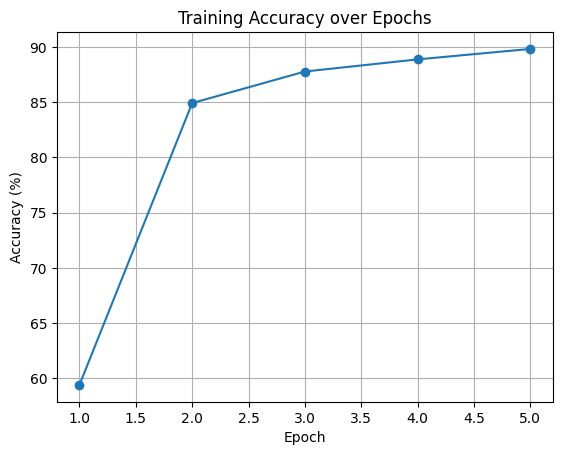

최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 50, 8])
최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 50, 8])
최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 50, 8])
최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 50, 8])
최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 50, 8])
최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 50, 8])
최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 50, 8])
최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 50, 8])
최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 50, 8])
최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 50, 8])
최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 50, 8])
최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 50, 8])
최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 50, 8])
최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 50, 8])
최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 50, 8])
최종 배치 처리 결과: 128
attention 결과 데이터 모양: torch.Size([128, 

In [15]:
# 7번블록: 학습루프+ 테스트평가+ 정확도그래프
# 데이터셋 로딩
train_dataset = MNIST(root="./", train=True, download=True, transform=ToTensor())
test_dataset = MNIST(root="./", train=False, download=True, transform=ToTensor())

train_loader = DataLoader(
    train_dataset, batch_size=MY_BATCH, shuffle=True
)  # batch_size = 128
test_loader = DataLoader(test_dataset, batch_size=MY_BATCH)

# 모델 초기화
model = MyViT(
    n_patches=MY_PATCH,  # 7
    n_encoder=MY_ENCODER,  # 2
    n_hidden=MY_HIDDEN,  # 8
    n_heads=MY_HEAD,  # 2
    n_class=MY_CLASS,  # 10
    image_shape=MY_SHAPE,  # (1, 28, 28)
).to(DEVICE)

criterion = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=MY_LEARNING)  # 학습률: 0.005

# 학습 기록용 리스트
train_accuracies = []

model.train()
start = time()

for epoch in range(MY_EPOCH):  # 총 5 에폭
    epoch_loss = 0
    correct = 0
    total = 0

    for batch_idx, (images, labels) in enumerate(train_loader):
        # train data에서 index, images, labels가 셋으로 제공됨
        images, labels = images.to(DEVICE), labels.to(DEVICE)  # GPU로 전송

        outputs = model(images)  # 출력 shape: [128, 10]
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    accuracy = 100 * correct / total
    train_accuracies.append(accuracy)
    print(f"[Epoch {epoch+1}] Loss: {epoch_loss:.4f} | Accuracy: {accuracy:.2f}%")

print("총 학습 시간:", round(time() - start, 2), "초")

# 정확도 그래프 출력
plt.plot(range(1, MY_EPOCH + 1), train_accuracies, marker="o")
plt.title("Training Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()

# 테스트 평가
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        outputs = model(images)
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

print(f"[Test Accuracy] {100 * correct / total:.2f}%")